In [178]:
training_sample = list()

try:
    with open("output/training_text/postgresql.txt", 'r', encoding='UTF8') as f:
        training_sample = f.readlines()
except:
    raise Exception("source file is not exist")


from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(training_sample)


In [179]:
# UMAP 생성
import umap

umap_model = umap.UMAP(n_components=2, metric='cosine')  # 2차원으로 축소
X_umap = umap_model.fit_transform(tfidf_matrix.toarray())  # 데이터 X를 UMAP에 적용하여 2차원으로 변환

In [204]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

# 그리드 탐색에 사용할 `eps`와 `min_samples` 값의 후보
eps_candidates = [0.0001, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.17, 0.18, 0.19, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7]
min_samples_candidates = [1,2]

best_score = -1
best_eps = None
best_min_samples = None

# 그리드 탐색 실행
for eps, min_samples in product(eps_candidates, min_samples_candidates):
    # DBSCAN 알고리즘을 실행하여 클러스터링 수행
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="cosine")
    dbscan.fit(X_umap)

    # 클러스터링 결과의 평가 지표인 실루엣 점수 계산
    labels = dbscan.labels_
    score = silhouette_score(X_umap, labels)
    print(score, eps, min_samples)

    # 현재 조합의 평가 지표를 확인하여 최적값 업데이트
    if score > best_score:
        best_score = score
        best_eps = eps
        best_min_samples = min_samples

# 최적 조합과 평가 지표 출력
print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)
print("Best silhouette score:", best_score)

# 최적 조합으로 DBSCAN 알고리즘 실행하여 최종 클러스터링 수행
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples, metric="cosine")
clusters = dbscan.fit_predict(X_umap)

# 최종 클러스터링 결과 확인
labels = dbscan.labels_


0.38721633 0.0001 1
0.38913706 0.0001 2
0.45849136 0.0005 1
0.45849136 0.0005 2
0.45849136 0.0006 1
0.45849136 0.0006 2
0.45849136 0.0007 1
0.45849136 0.0007 2
0.44739598 0.0008 1
0.44739598 0.0008 2
0.44739598 0.0009 1
0.44739598 0.0009 2
0.44739598 0.001 1
0.44739598 0.001 2
0.37746027 0.005 1
0.37746027 0.005 2
0.36154372 0.01 1
0.36154372 0.01 2
0.45599386 0.05 1
0.45599386 0.05 2
0.45599386 0.1 1
0.45599386 0.1 2
0.45599386 0.15 1
0.45599386 0.15 2
0.45599386 0.17 1
0.45599386 0.17 2
0.4833461 0.18 1
0.4833461 0.18 2
0.4833461 0.19 1
0.4833461 0.19 2
0.4833461 0.2 1
0.4833461 0.2 2
0.46564743 0.25 1
0.46564743 0.25 2
0.46564743 0.3 1
0.46564743 0.3 2
0.46564743 0.4 1
0.46564743 0.4 2
0.46564743 0.5 1
0.46564743 0.5 2
0.46564743 0.6 1
0.46564743 0.6 2
0.46564743 0.7 1
0.46564743 0.7 2
Best eps: 0.18
Best min_samples: 1
Best silhouette score: 0.4833461


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 2 1 2 1 0 1 2 3 0 1 2 0 1 0 1 0 1 2 0 1 2
 3 0 1 2 3 0 1 2 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2 3 0 1 0 1 1 0 1 0 1 0 1 0
 1 0 1 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2 0 1 0 1 0 1 0 1 0 1 0 1 2 3 0 1 0 1
 0 1 0 1 0 1 0 1 1 1 0 1 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 1 2 1 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]
445
Cluster -1 size: 0
Cluster 0 size: 361
Cluster 1 size: 57
Cluster 2 size: 21
Cluster 3 size:

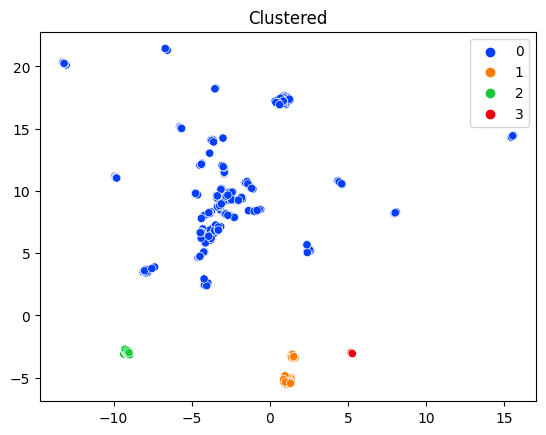

In [207]:
dbscan = DBSCAN(eps=0.05, min_samples=1, metric="cosine")
clusters = dbscan.fit_predict(X_umap)


import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette('bright', len(set(clusters)))

sns.scatterplot(x=X_umap[:,0], y=X_umap[:, 1], hue=clusters, legend='full', palette=palette)
plt.title('Clustered')

print(clusters)
print(len(clusters))

print(f"Cluster -1 size: {sum(clusters == -1)}")

for i in range(clusters.max()+1):
    print(f"Cluster {i} size: {sum(clusters == i)}")

In [139]:
for idx, x in enumerate(X_umap):
    if x[0] > 6:
        print(idx, x, training_sample[idx][:100])

1 [ 7.1951594 26.485285 ] [Delay] OnTuneMainThread SecTimer Interval is delayed.(<:NUM:> sec), AgentLogBufferCount: <:NUM:>

2 [ 7.1463532 26.463228 ] [Delay] OnTuneDBThread SecTimer Interval is delayed.(<:NUM:> sec), AgentLogBufferCount: <:NUM:>

4 [ 9.846672 17.455788] jjwreo1a: CPU total value is invalid.user:<:NUM:>, sys:<:NUM:>, wait:<:NUM:>, idle:<:NUM:>)

7 [ 6.914715 26.231314] pbaksv2a: CPU total value is invalid.user:<:NUM:>, sys:<:NUM:>, wait:<:NUM:>, idle:<:NUM:>, stolen:<
8 [ 7.0266294 26.351366 ] JEJUDB: CPU total value is invalid.user:<:NUM:>, sys:<:NUM:>, wait:<:NUM:>, idle:<:NUM:>, stolen:<:N
9 [ 6.9914603 26.239918 ] jjrintla: CPU total value is invalid.user:<:NUM:>, sys:<:NUM:>, wait:<:NUM:>, idle:<:NUM:>, stolen:<
10 [ 6.999607 26.291328] fileserver: CPU total value is invalid.user:<:NUM:>, sys:<:NUM:>, wait:<:NUM:>, idle:<:NUM:>, stolen
11 [ 6.975978 26.24118 ] jjlint1a: CPU total value is invalid.user:<:NUM:>, sys:<:NUM:>, wait:<:NUM:>, idle:<:NUM:>, stolen:<
12 [

In [212]:
for idx, x in enumerate(X_umap):
    if clusters[idx] == 3:
        print(idx, x, training_sample[idx])

60 [ 5.187106  -2.9805803] KST ontune@<:IP:>(<:NUM:>)/ontune <:NUM:> DETAIL: Key (relname, relnamespace)=(realtimeproc-<:DATETIME:> pkey, <:NUM:>) already exists.

74 [ 5.2486677 -3.0437615] KST ontune@<:IP:>(<:NUM:>)/ontune <:NUM:> DETAIL: Key (relname, relnamespace)=(realtimeadpt-<:DATETIME:> pkey, <:NUM:>) already exists.

78 [ 5.230067 -3.022027] KST ontune@<:IP:>(<:NUM:>)/ontune <:NUM:> DETAIL: Key (relname, relnamespace)=(realtimelv-<:DATETIME:> pkey, <:NUM:>) already exists.

82 [ 5.2324686 -3.0252185] KST ontune@<:IP:>(<:NUM:>)/ontune <:NUM:> DETAIL: Key (relname, relnamespace)=(realtimevg-<:DATETIME:> pkey, <:NUM:>) already exists.

98 [ 5.203615 -2.990572] KST ontune@<:IP:>(<:NUM:>)/ontune <:NUM:> DETAIL: Key (relname, relnamespace)=(avgpid-<:DATETIME:> pkey, <:NUM:>) already exists.

143 [ 5.2708626 -3.0625827] KST ontune@<:IP:>(<:NUM:>)/ontune <:NUM:> DETAIL: Key (relname, relnamespace)=(realtimenumamem-<:DATETIME:> pkey, <:NUM:>) already exists.



In [172]:
ci=17
print(f"Cluster {ci+1}: {training_sample[ci]}")
print(X_umap[ci])
print(clusters[ci])

Cluster 18: [OTEVM11I] [Main] Filter Tab Changed Current = <:NUM:>, TabCount = <:NUM:>

[-6.197814   1.8889058]
1


In [53]:
idfstr = "<:NUM:> | ontune | "
for idx, x in enumerate(X_umap):
    if clusters[idx] != 6 and training_sample[idx][:len(idfstr)] == idfstr:
        print(idx, x, training_sample[idx][:100])

1912 [13.471039   5.1577225] <:NUM:> | ontune | <:IP:> | copy realtimeproc-<:DATETIME:> FROM 'D:\onTune\Data\<:ALNUM:>-<:DATETIME
1963 [13.45976    5.1790514] <:NUM:> | ontune | <:IP:> | copy realtimecpu-<:DATETIME:> FROM 'D:\onTune\Data\<:ALNUM:>-<:DATETIME:
1964 [13.410781   5.3284407] <:NUM:> | ontune | <:IP:> | SELECT * FROM lastperf | active | <:NUM:>:<:NUM:>:<:NUM:>.<:NUM:> | COMM
1965 [13.359908   4.8911314] <:NUM:> | ontune | <:IP:> | SELECT

1982 [13.426047   5.3606734] <:NUM:> | ontune | <:IP:> | SELECT * FROM lastperf | active | <:NUM:>:<:NUM:>:<:NUM:>.<:NUM:> | trun
1995 [13.381867   5.3076215] <:NUM:> | ontune | <:IP:> | SELECT * FROM eventontuneinfo WHERE enabled = <:NUM:> ORDER BY name | ac
1999 [13.489949  5.163068] <:NUM:> | ontune | <:IP:> | copy realtimepid-<:DATETIME:> FROM 'D:\onTune\Data\<:ALNUM:>-<:DATETIME:
2000 [13.4675045  5.1717553] <:NUM:> | ontune | <:IP:> | copy realtimeperf-<:DATETIME:> FROM 'D:\onTune\Data\<:ALNUM:>-<:DATETIME
2229 [13.452433   5.2221413